### Connect to Drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
%cd /gdrive/MyDrive/deep learning project 2

/gdrive/MyDrive/deep learning project 2


## Data prepration

In [169]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', size=16) 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import warnings
import logging
import sklearn
from tensorflow.keras import layers
tfk = tf.keras
tfkl = tf.keras.layers
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight
print(tf.__version__)

2.9.2


#### Set seed for reproducibility

In [204]:
# Random seed for reproducibility
seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

### Load and clean the dataset

In [234]:
x_train = np.load('dataset/x_train.npy')
y_train = np.load('dataset/y_train.npy')
print("training shape: ", x_train.shape)
print("testing shape: ", y_train.shape)


training shape:  (2429, 36, 6)
testing shape:  (2429,)


In [ ]:
print("training shape before: ", x_train.shape)
a = np.delete(x_train, [2,4,1,], 2)
print("training shape after: ", a.shape)
x_train = a

training shape before:  (2429, 36, 6)
training shape after:  (2429, 36, 2)


(2429, 36, 6)

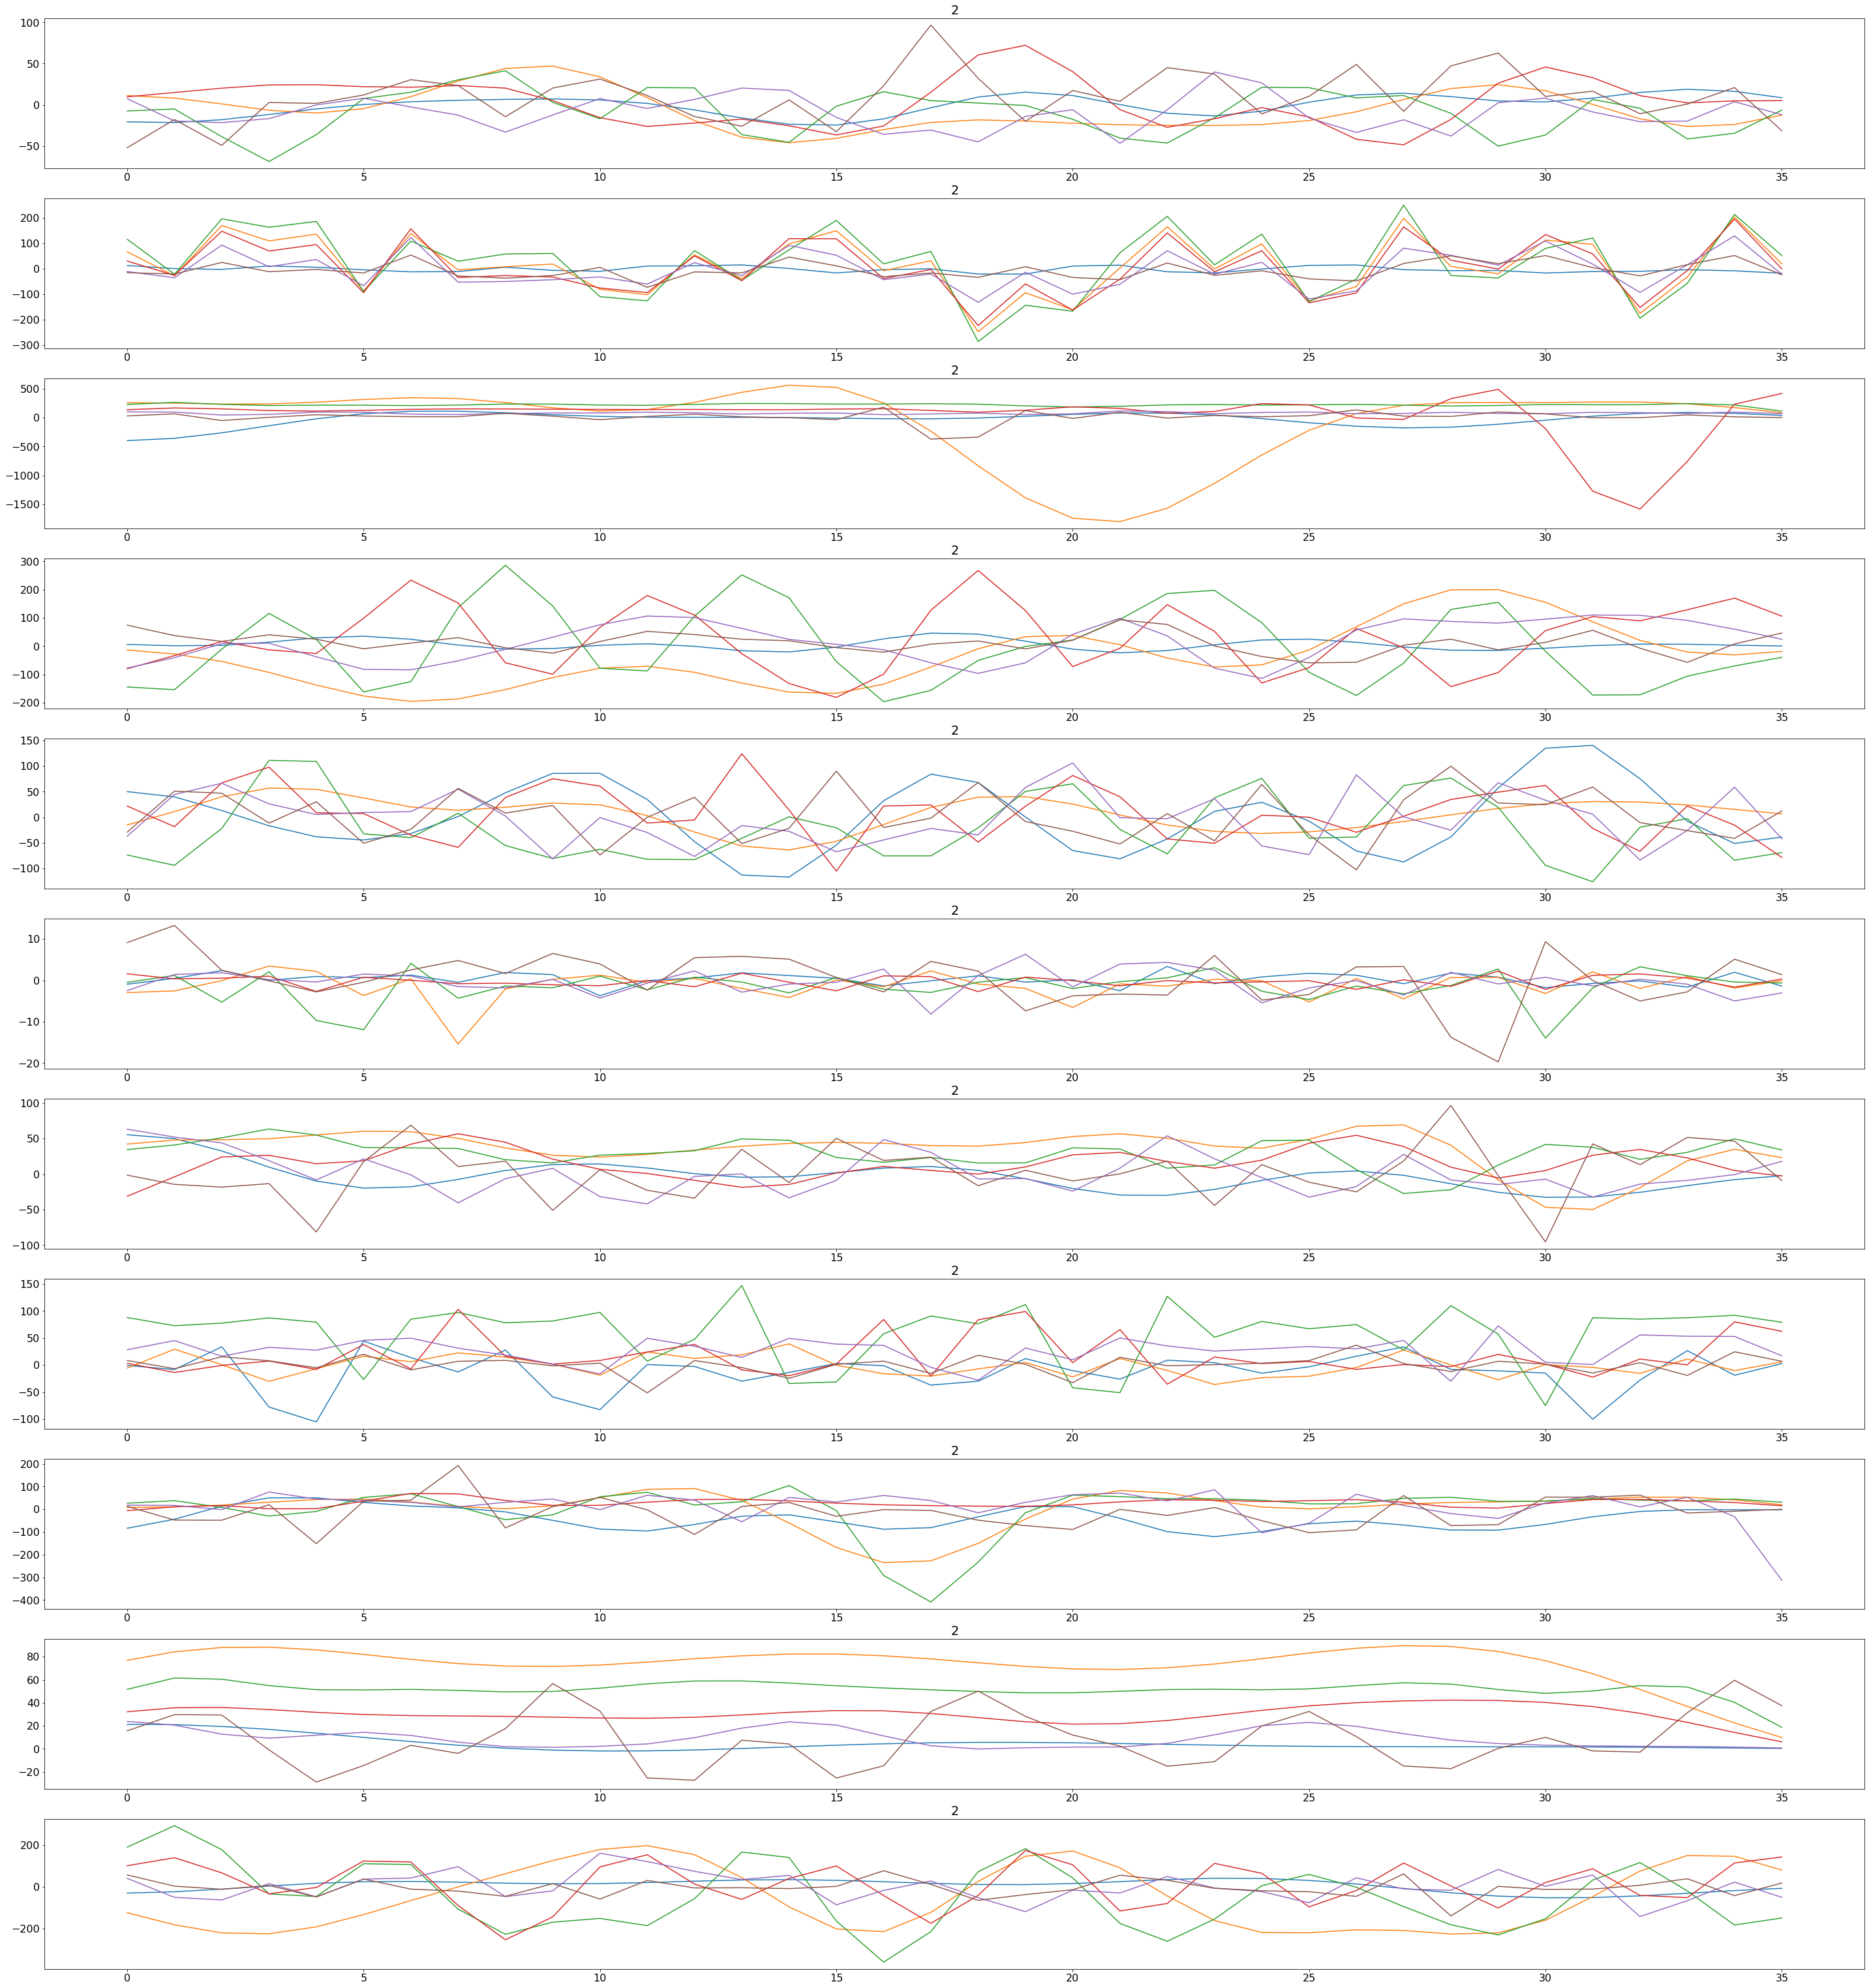

In [ ]:
from numpy.random.mtrand import randint
from tensorflow.python.ops.math_ops import Range

def plot(Series):
  target = 2
  fig, ax = plt.subplots(11, 1 , figsize=(50,55)) 
  for i in range(11):
    aa = Series[y_train==target]
    ax[i].plot(aa[i+10])
    ax[i].set_title(str(target))
plot(x_train)
x_train.shape



In [100]:
print("class 0:  train ", np.count_nonzero(y_train == 0))
print("class 1:  train ", np.count_nonzero(y_train == 1))
print("class 2:  train ", np.count_nonzero(y_train == 2))
print("class 3:  train ", np.count_nonzero(y_train == 3))
print("class 4:  train ", np.count_nonzero(y_train == 4))
print("class 5:  train ", np.count_nonzero(y_train == 5))
print("class 6:  train ", np.count_nonzero(y_train == 6))
print("class 6:  train ", np.count_nonzero(y_train == 6))
print("class 7:  train ", np.count_nonzero(y_train == 7))
print("class 8:  train ", np.count_nonzero(y_train == 8))
print("class 6:  train ", np.count_nonzero(y_train == 6))
print("class 9:  train ", np.count_nonzero(y_train == 9))
print("class 10: train ", np.count_nonzero(y_train == 10))
print("class 11: train ", np.count_nonzero(y_train == 11))


class 0:  train  34
class 1:  train  123
class 2:  train  270
class 3:  train  381
class 4:  train  62
class 5:  train  153
class 6:  train  313
class 6:  train  313
class 7:  train  68
class 8:  train  120
class 6:  train  313
class 9:  train  777
class 10: train  77
class 11: train  51


In [101]:
class_weights = compute_class_weight(class_weight = 'balanced',classes=np.unique(y_train), y=y_train)
class_weights= dict(enumerate(class_weights.flatten(), 0))
class_weights

{0: 5.953431372549019,
 1: 1.6456639566395663,
 2: 0.7496913580246913,
 3: 0.5312773403324584,
 4: 3.264784946236559,
 5: 1.3229847494553377,
 6: 0.6466986155484558,
 7: 2.9767156862745097,
 8: 1.6868055555555554,
 9: 0.2605105105105105,
 10: 2.628787878787879,
 11: 3.968954248366013}

In [226]:
#splitting
x_train,y_train=sklearn.utils.shuffle(x_train,y_train)
x_test_set=x_train[int(0.75*len(x_train))+1:]
y_test_set=y_train[int(0.75*len(x_train))+1:]
# x_val=x_train[int(0.65*len(x_train))+1:int(0.75*len(x_train))]
# y_val=y_train[int(0.65*len(y_train))+1:int(0.75*len(y_train))]
x_train=x_train[0:int(0.75*len(x_train))]
y_train=y_train[0:int(0.75*len(y_train))]




x_train.shape,y_train.shape,x_test_set.shape,y_test_set.shape

((1821, 36, 6), (1821,), (607, 36, 6), (607,))

In [173]:
#occurancies of each class
print("class      train    test: ")
print("class 0:   ", np.count_nonzero(y_train == 0), "     ", np.count_nonzero(y_test_set == 0))
print("class 1:   ", np.count_nonzero(y_train == 1), "     ", np.count_nonzero(y_test_set == 1))
print("class 2:   ", np.count_nonzero(y_train == 2), "    ", np.count_nonzero(y_test_set == 2))
print("class 3:   ", np.count_nonzero(y_train == 3), "    ", np.count_nonzero(y_test_set == 3))
print("class 4:   ", np.count_nonzero(y_train == 4), "     ", np.count_nonzero(y_test_set == 4))
print("class 5:   ", np.count_nonzero(y_train == 5), "    ", np.count_nonzero(y_test_set == 5))
print("class 6:   ", np.count_nonzero(y_train == 6), "    ", np.count_nonzero(y_test_set == 6))
print("class 7:   ", np.count_nonzero(y_train == 7), "     ", np.count_nonzero(y_test_set == 7))
print("class 8:   ", np.count_nonzero(y_train == 8), "     ", np.count_nonzero(y_test_set == 8))
print("class 9:   ", np.count_nonzero(y_train == 9), "    ", np.count_nonzero(y_test_set == 9))
print("class 10:  ", np.count_nonzero(y_train == 10), "     ", np.count_nonzero(y_test_set == 10))
print("class 11:  ", np.count_nonzero(y_train == 11), "     ", np.count_nonzero(y_test_set == 11))

class      train    test: 
class 0:    27       7
class 1:    98       25
class 2:    219      51
class 3:    284      97
class 4:    47       15
class 5:    112      41
class 6:    229      84
class 7:    54       13
class 8:    88       32
class 9:    579      198
class 10:   47       30
class 11:   37       14


### Data augmentation

#### Noise

In [ ]:
def window_shift(data,labels,window):
  data_copy=data.copy()
  labels_copy=labels.copy()
  for i in range(36-window):
    copy=data_copy.copy()
    #print(copy[:,i:i+window,:].shape)
    for x in copy[:,i:i+window,:]:
      #print(x.shape)
          zeros=np.zeros(copy[:,i:i+window,:].shape)
          copy[:,i:i+window,:]=zeros
    data=np.concatenate((data,copy))
    labels=np.concatenate((labels,labels_copy))
  print("data shape:",data.shape)
  print("labels shape:",labels.shape)
  return(data,labels)
x_train,y_train=window_shift(x_train,y_train,4)

data shape: (60093, 36, 6)
labels shape: (60093,)


In [ ]:
#Standardization
def standardize(data,all_samples):

  if all_samples:
    for i in range(6):
      flat=data[:,:,i].flatten()
      mean=np.mean(flat)
      std=np.std(flat)
      data[:,:,i]=(data[:,:,i]-mean)/std

  else:
    for i in range(6):
      for j in range(data.shape[0]):
        mean=np.mean(data[j,:,i])
        std=np.std(data[j,:,i])
        data[j,:,i]=(data[j,:,i]-mean)/std

  return(data)

x_train2=standardize(x_train,False)
x_train2.shape, np.mean(x_train2[:,:,0]),np.std(x_train2[:,:,0]),np.min(x_train2[:,:,0]),np.max(x_train2[:,:,0])

#### Check new dataset

In [ ]:
#occurancies of each class
print("new data set length: ",x_train.shape,y_train.shape)
print("class 0: ", np.count_nonzero(y_train == 0))
print("class 1: ", np.count_nonzero(y_train == 1))
print("class 2: ", np.count_nonzero(y_train == 2))
print("class 3: ", np.count_nonzero(y_train == 3))
print("class 4: ", np.count_nonzero(y_train == 4))
print("class 5: ", np.count_nonzero(y_train == 5))
print("class 6: ", np.count_nonzero(y_train == 6))
print("class 7: ", np.count_nonzero(y_train == 7))
print("class 8: ", np.count_nonzero(y_train == 8))
print("class 9: ", np.count_nonzero(y_train == 9))
print("class 10: ", np.count_nonzero(y_train == 10))
print("class 11: ", np.count_nonzero(y_train == 11))

new data set length:  (60093, 36, 6) (60093,)
class 0:  891
class 1:  3234
class 2:  7227
class 3:  9372
class 4:  1551
class 5:  3696
class 6:  7557
class 7:  1782
class 8:  2904
class 9:  19107
class 10:  1551
class 11:  1221


### Tensor preparation

In [174]:
labels={0: "Wish",
1: "Another",
2: "Comfortably",
3: "Money",
4: "Breathe",
5: "Time",
6: "Brain",
7: "Echoes",
8: "Wearing",
9: "Sorrow",
10: "Hey",
11: "Shine"}



In [227]:
x_train,y_train=sklearn.utils.shuffle(x_train,y_train)

In [235]:
#to tensor k-fold
x_train=tf.convert_to_tensor(x_train)
y_train=tf.convert_to_tensor(y_train)

# Convert the sparse labels to categorical values
y_train = tfk.utils.to_categorical(y_train)

In [228]:
#to tensor
x_train=tf.convert_to_tensor(x_train)
y_train=tf.convert_to_tensor(y_train)
x_test=tf.convert_to_tensor(x_test_set)
y_test=tf.convert_to_tensor(y_test_set)




In [229]:
# Convert the sparse labels to categorical values
y_train = tfk.utils.to_categorical(y_train)
y_test = tfk.utils.to_categorical(y_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

(TensorShape([1821, 36, 6]), (1821, 12), TensorShape([607, 36, 6]), (607, 12))

In [168]:
model = tfk.models.load_model('model1')

In [208]:
# Predict the test set with the BiLSTM
predictions = modelz[1].predict(x_train)
accuracy = accuracy_score(np.argmax(y_train, axis=-1), np.argmax(predictions, axis=-1))
print('Accuracy:',accuracy.round(4))
predictions.shape

76/76 [==============================] - 1s 11ms/step
Accuracy: 0.9629


(2429, 12)

## Build and train models

In [123]:
input_shape = (36,6)
classes = (12)
batch_size = 64
epochs = 200

In [64]:
del model

### Vanilla Long Short Term Memory (LSTM) Neural Network

![](https://drive.google.com/uc?export=view&id=1FZ_P4SgVAA_mCZQ0tK18VwRqGqzNANOE
)

In [ ]:
def build_LSTM_classifier(input_shape, classes):
    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    # Feature extractor
    lstm = tfkl.LSTM(128, return_sequences=True)(input_layer)
    lstm = tfkl.LSTM(128)(lstm)
    dropout = tfkl.Dropout(.5, seed=seed)(lstm)


    # Classifier
    classifier = tfkl.Dense(256, activation='relu')(dropout)
    #dropout = tfkl.Dropout(.6, seed=seed)(classifier)
    output_layer = tfkl.Dense(classes, activation='softmax')(classifier)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    # Compile the model
    model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')

    # Return the model
    return model

In [ ]:
model = build_LSTM_classifier(input_shape, classes)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 36, 6)]           0         
                                                                 
 lstm (LSTM)                 (None, 36, 128)           69120     
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 256)               33024     
                                                                 
 dense_1 (Dense)             (None, 12)                3084      
                                                                 
Total params: 236,812
Trainable params: 236,812
Non-trainable

In [ ]:
# Train the model
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_data=(x_test, y_test),
    #class_weight = class_weights,
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=15, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=5, factor=0.1, min_lr=0.1e-8)
    ]
).history

Epoch 1/200
29/29 [==============================] - 9s 38ms/step - loss: 1.9732 - accuracy: 0.3613 - val_loss: 1.6282 - val_accuracy: 0.4465 - lr: 0.0010
Epoch 2/200
29/29 [==============================] - 0s 12ms/step - loss: 1.4892 - accuracy: 0.4860 - val_loss: 1.3716 - val_accuracy: 0.5124 - lr: 0.0010
Epoch 3/200
29/29 [==============================] - 0s 12ms/step - loss: 1.2911 - accuracy: 0.5530 - val_loss: 1.2254 - val_accuracy: 0.5618 - lr: 0.0010
Epoch 4/200
29/29 [==============================] - 0s 11ms/step - loss: 1.1217 - accuracy: 0.6052 - val_loss: 1.1462 - val_accuracy: 0.5931 - lr: 0.0010
Epoch 5/200
29/29 [==============================] - 0s 12ms/step - loss: 1.0028 - accuracy: 0.6557 - val_loss: 1.1508 - val_accuracy: 0.6013 - lr: 0.0010
Epoch 6/200
29/29 [==============================] - 0s 12ms/step - loss: 0.9219 - accuracy: 0.6908 - val_loss: 1.1685 - val_accuracy: 0.5700 - lr: 0.0010
Epoch 7/200
29/29 [==============================] - 0s 11ms/step - lo

In [ ]:
best_epoch = np.argmax(history['val_accuracy'])
plt.figure(figsize=(17,4))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.plot(history['val_loss'], label='Validation loss', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Categorical Crossentropy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(17,4))
plt.plot(history['accuracy'], label='Training accuracy', alpha=.8, color='#ff7f0e')
plt.plot(history['val_accuracy'], label='Validation accuracy', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(17,4))
plt.plot(history['lr'], label='Learning Rate', alpha=.8, color='#ff7f0e')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [ ]:
# model.save('LSTM')
# # model = tfk.models.load_model('LSTM')

In [ ]:
# Predict the test set with the LSTM
predictions = model.predict(x_test)
predictions.shape

19/19 [==============================] - 1s 4ms/step


(607, 12)

Accuracy: 0.6425
Precision: 0.44
Recall: 0.4596
F1: 0.444


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


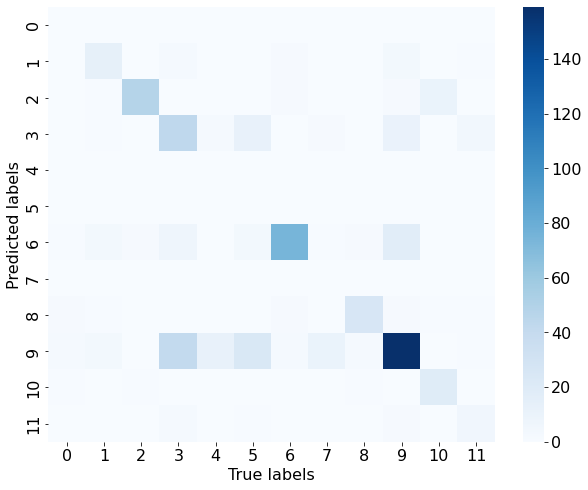

In [ ]:
# Compute the confusion matrix

cm = confusion_matrix(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1))

# Compute the classification metrics
accuracy = accuracy_score(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1))
precision = precision_score(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1), average='macro')
recall = recall_score(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1), average='macro')
f1 = f1_score(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1), average='macro')
print('Accuracy:',accuracy.round(4))
print('Precision:',precision.round(4))
print('Recall:',recall.round(4))
print('F1:',f1.round(4))

# Plot the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm.T, cmap='Blues', xticklabels=list(labels.keys()), yticklabels=list(labels.keys()))
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()

### Bidirectional Long Short Term Memory (BiLSTM) Neural Network

![](https://drive.google.com/uc?export=view&id=1CN-jJqzb5AurhnMMiuvdVCaPGy2KReLc
)

In [34]:
del model

In [191]:
def build_BiLSTM_classifier(input_shape, classes):
    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    # Feature extractor
    bilstm = tfkl.Bidirectional(tfkl.LSTM(512, return_sequences=True))(input_layer)
    bilstm = tfkl.Bidirectional(tfkl.LSTM(256))(bilstm)
    #dropout = tfkl.Dropout(.1, seed=seed)(bilstm)

    # Classifier
    classifier = tfkl.Dense(256, activation='relu')(bilstm)
    output_layer = tfkl.Dense(classes, activation='softmax')(classifier)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    # Compile the model
    model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')

    # Return the model
    return model

In [125]:
model = build_BiLSTM_classifier(input_shape, classes)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 36, 6)]           0         
                                                                 
 bidirectional_42 (Bidirecti  (None, 36, 1024)         2125824   
 onal)                                                           
                                                                 
 bidirectional_43 (Bidirecti  (None, 512)              2623488   
 onal)                                                           
                                                                 
 dense_42 (Dense)            (None, 256)               131328    
                                                                 
 dense_43 (Dense)            (None, 12)                3084      
                                                                 
Total params: 4,883,724
Trainable params: 4,883,724
Non-train

In [211]:
from sklearn.model_selection import KFold

num_folds = 8

histories = []
scores = []
modelz2=[]




kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)

for fold_idx, (train_idx, valid_idx) in enumerate(kfold.split(x_train, y_train)):
  # print("train_idx is : " )
  # print( *train_idx)
  # print( len(train_idx))
  print("Starting training on fold num: {}".format(fold_idx+1))

  model = model = build_BiLSTM_classifier(input_shape, classes)

  x_train_set = x_train[train_idx]
  y_train_set = y_train[train_idx]

  x_test_set = x_train[valid_idx]
  y_test_set = y_train[valid_idx]



  x_train_set=tf.convert_to_tensor(x_train_set)
  y_train_set=tf.convert_to_tensor(y_train_set)

  x_test_set=tf.convert_to_tensor(x_test_set)
  y_test_set=tf.convert_to_tensor(y_test_set)

  # Convert the sparse labels to categorical values
  y_train_set = tfk.utils.to_categorical(y_train_set)
  y_test_set = tfk.utils.to_categorical(y_test_set)




  history = model.fit(
    x = x_train_set,
    y = y_train_set,
    batch_size = batch_size,
    epochs = epochs,
    validation_data=(x_test_set, y_test_set),
    callbacks=[
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=5, factor=0.5, min_lr=1e-9)
    ],
  ).history
  
  score = model.evaluate(x_test_set, y_test_set)
  scores.append(score[1])
  modelz2.append(model)
  histories.append(history)

Starting training on fold num: 1
Epoch 1/200
34/34 [==============================] - 7s 74ms/step - loss: 1.5577 - accuracy: 0.4692 - val_loss: 1.2032 - val_accuracy: 0.5428 - lr: 0.0010
Epoch 2/200
34/34 [==============================] - 1s 32ms/step - loss: 1.0720 - accuracy: 0.6207 - val_loss: 0.8982 - val_accuracy: 0.7237 - lr: 0.0010
Epoch 3/200
34/34 [==============================] - 1s 31ms/step - loss: 0.8353 - accuracy: 0.7068 - val_loss: 0.8719 - val_accuracy: 0.7204 - lr: 0.0010
Epoch 4/200
34/34 [==============================] - 1s 31ms/step - loss: 0.6970 - accuracy: 0.7699 - val_loss: 0.8819 - val_accuracy: 0.6974 - lr: 0.0010
Epoch 5/200
34/34 [==============================] - 1s 31ms/step - loss: 0.5506 - accuracy: 0.8165 - val_loss: 0.8851 - val_accuracy: 0.7171 - lr: 0.0010
Epoch 6/200
34/34 [==============================] - 1s 31ms/step - loss: 0.3991 - accuracy: 0.8692 - val_loss: 0.9339 - val_accuracy: 0.6908 - lr: 0.0010
Epoch 7/200
34/34 [==================

In [224]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Average

model1 = modelz2[0]
model2 = modelz2[1]
model3 = modelz2[2]
model4 = modelz2[3]
model5 = modelz2[4]
model6 = modelz2[5]
model7 = modelz2[6]
model8 = modelz2[7]

# model_2 = Model(inputs=model_2.inputs, outputs=model_2.outputs, name='model_2')
# model_1 = Model(inputs=model_1.inputs, outputs=model_1.outputs, name='model_1')
model1 = Model(inputs=model1.inputs, outputs=model1.outputs, name='model1')
model2 = Model(inputs=model2.inputs, outputs=model2.outputs, name='model2')
model3 = Model(inputs=model3.inputs, outputs=model3.outputs, name='model3')
model4 = Model(inputs=model4.inputs, outputs=model4.outputs, name='model4')
model5 = Model(inputs=model5.inputs, outputs=model5.outputs, name='model5')
model6 = Model(inputs=model6.inputs, outputs=model6.outputs, name='model6')
model7 = Model(inputs=model7.inputs, outputs=model7.outputs, name='model7')
model8 = Model(inputs=model8.inputs, outputs=model8.outputs, name='model8')




models = [model1, model2, model3, model4, model5, model6, model7, model8]
model_input = Input(shape=(36,6))
model_outputs = [model(model_input) for model in models]
ensemble_output = Average()(model_outputs)
ensemble_model = Model(inputs=model_input, outputs=ensemble_output, name='ensemble')
ensemble_model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(1e-4), metrics='accuracy')


In [230]:
ensemble_history = ensemble_model.fit(
    x = x_train,
    y = y_train,
    epochs = 200,
    validation_data=(x_test, y_test),
    callbacks = [tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=15, restore_best_weights=True)]
).history

Epoch 1/200
57/57 [==============================] - 59s 355ms/step - loss: 0.1023 - accuracy: 0.9989 - val_loss: 0.1086 - val_accuracy: 0.9951
Epoch 2/200
57/57 [==============================] - 9s 165ms/step - loss: 0.0717 - accuracy: 1.0000 - val_loss: 0.1037 - val_accuracy: 0.9951
Epoch 3/200
57/57 [==============================] - 9s 166ms/step - loss: 0.0583 - accuracy: 1.0000 - val_loss: 0.1024 - val_accuracy: 0.9951
Epoch 4/200
57/57 [==============================] - 9s 166ms/step - loss: 0.0485 - accuracy: 1.0000 - val_loss: 0.1007 - val_accuracy: 0.9951
Epoch 5/200
57/57 [==============================] - 9s 167ms/step - loss: 0.0415 - accuracy: 1.0000 - val_loss: 0.0998 - val_accuracy: 0.9951
Epoch 6/200
57/57 [==============================] - 10s 168ms/step - loss: 0.0368 - accuracy: 1.0000 - val_loss: 0.1002 - val_accuracy: 0.9951
Epoch 7/200
57/57 [==============================] - 10s 168ms/step - loss: 0.0340 - accuracy: 1.0000 - val_loss: 0.0994 - val_accuracy: 0.9

In [241]:
# Predict the test set with the BiLSTM
predictions = modelz2[0].predict(x_train)
accuracy = accuracy_score(np.argmax(y_train, axis=-1), np.argmax(predictions, axis=-1))
print('Accuracy:',accuracy.round(4))
predictions.shape

76/76 [==============================] - 1s 9ms/step
Accuracy: 0.9798


(2429, 12)

In [ ]:
# Train the model
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_data=(x_test, y_test),
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=5, factor=0.5, min_lr=1e-9)
    ]
).history

In [232]:
model.save('ensemble')

In [166]:
# Predict the test set with the BiLSTM
predictions = model.predict(x_test_set)
accuracy = accuracy_score(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1))
print('Accuracy:',accuracy.round(4))
predictions.shape

8/8 [==============================] - 0s 18ms/step


TypeError: ignored

In [ ]:
best_epoch = np.argmax(history['val_accuracy'])
plt.figure(figsize=(17,4))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.plot(history['val_loss'], label='Validation loss', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Categorical Crossentropy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(17,4))
plt.plot(history['accuracy'], label='Training accuracy', alpha=.8, color='#ff7f0e')
plt.plot(history['val_accuracy'], label='Validation accuracy', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(18,3))
plt.plot(history['lr'], label='Learning Rate', alpha=.8, color='#ff7f0e')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [ ]:
# model.save('BiLSTM')
# # model = tfk.models.load_model('BiLSTM')

In [21]:
# Compute the confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1))

# Compute the classification metrics
accuracy = accuracy_score(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1))
precision = precision_score(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1), average='macro')
recall = recall_score(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1), average='macro')
f1 = f1_score(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1), average='macro')
print('Accuracy:',accuracy.round(4))
print('Precision:',precision.round(4))
print('Recall:',recall.round(4))
print('F1:',f1.round(4))

# Plot the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm.T, cmap='Blues', xticklabels=list(labels.keys()), yticklabels=list(labels.keys()))
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()

NameError: ignored

## 1D Convolutional Neural Network

![](https://drive.google.com/uc?export=view&id=10B7c-F58-eNr6CP7D_UZeVp0gTeYMrFQ
)

In [ ]:
def build_1DCNN_classifier(input_shape, classes):
    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    # Feature extractor
    cnn = tfkl.Conv1D(128,3,padding='same',activation='relu')(input_layer)
    cnn = tfkl.MaxPooling1D()(cnn)
    cnn = tfkl.Conv1D(128,3,padding='same',activation='relu')(cnn)
    gap = tfkl.GlobalAveragePooling1D()(cnn)
    dropout = tfkl.Dropout(.1, seed=seed)(gap)

    # Classifier
    classifier = tfkl.Dense(128, activation='relu')(dropout)
    output_layer = tfkl.Dense(classes, activation='softmax')(classifier)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    # Compile the model
    model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')

    # Return the model
    return model

In [ ]:
model = build_1DCNN_classifier(input_shape, classes)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 36, 6)]           0         
                                                                 
 conv1d_167 (Conv1D)         (None, 36, 128)           2432      
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 18, 128)          0         
 1D)                                                             
                                                                 
 conv1d_168 (Conv1D)         (None, 18, 128)           49280     
                                                                 
 global_average_pooling1d_5   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_198 (Dropout)       (None, 128)               0     

In [ ]:
# Train the model
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_data=(x_test, y_test),
    class_weight = class_weights,
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=30, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=5, factor=0.5, min_lr=1e-5)
    ]
).history

Epoch 1/200
29/29 [==============================] - 1s 15ms/step - loss: 33.9805 - accuracy: 0.0489 - val_loss: 10.0969 - val_accuracy: 0.0708 - lr: 0.0010
Epoch 2/200
29/29 [==============================] - 0s 5ms/step - loss: 10.6064 - accuracy: 0.0780 - val_loss: 6.3017 - val_accuracy: 0.0659 - lr: 0.0010
Epoch 3/200
29/29 [==============================] - 0s 5ms/step - loss: 8.1976 - accuracy: 0.1016 - val_loss: 6.9120 - val_accuracy: 0.1713 - lr: 0.0010
Epoch 4/200
29/29 [==============================] - 0s 7ms/step - loss: 7.6787 - accuracy: 0.1323 - val_loss: 4.9011 - val_accuracy: 0.1236 - lr: 0.0010
Epoch 5/200
29/29 [==============================] - 0s 5ms/step - loss: 7.1514 - accuracy: 0.1323 - val_loss: 6.2443 - val_accuracy: 0.0741 - lr: 0.0010
Epoch 6/200
29/29 [==============================] - 0s 5ms/step - loss: 4.8861 - accuracy: 0.1241 - val_loss: 4.6167 - val_accuracy: 0.1598 - lr: 0.0010
Epoch 7/200
29/29 [==============================] - 0s 6ms/step - loss:

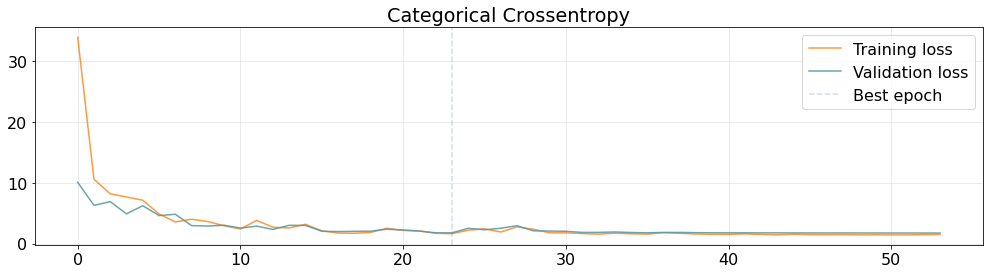

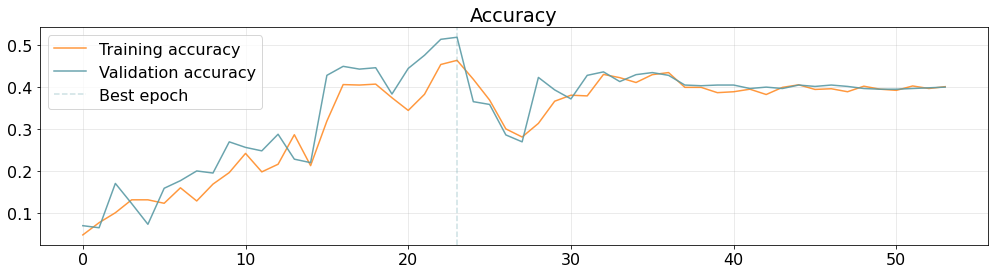

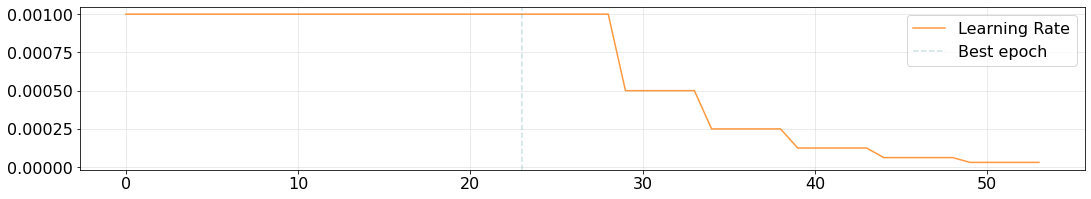

In [ ]:
best_epoch = np.argmax(history['val_accuracy'])
plt.figure(figsize=(17,4))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.plot(history['val_loss'], label='Validation loss', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Categorical Crossentropy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(17,4))
plt.plot(history['accuracy'], label='Training accuracy', alpha=.8, color='#ff7f0e')
plt.plot(history['val_accuracy'], label='Validation accuracy', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(18,3))
plt.plot(history['lr'], label='Learning Rate', alpha=.8, color='#ff7f0e')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [ ]:
# model.save('1DCNN')
# # model = tfk.models.load_model('1DCNN')

In [ ]:
# Predict the test set with the 1DCNN
predictions = model.predict(x_test)
predictions.shape

19/19 [==============================] - 0s 2ms/step


(607, 12)

Accuracy: 0.5189
Precision: 0.4653
Recall: 0.5287
F1: 0.4766


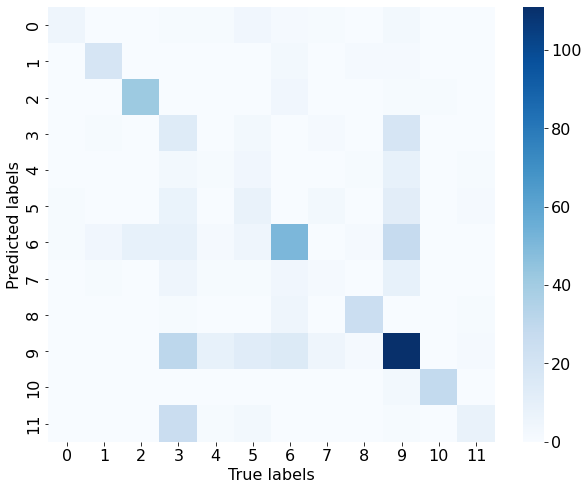

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1))

# Compute the classification metrics
accuracy = accuracy_score(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1))
precision = precision_score(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1), average='macro')
recall = recall_score(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1), average='macro')
f1 = f1_score(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1), average='macro')
print('Accuracy:',accuracy.round(4))
print('Precision:',precision.round(4))
print('Recall:',recall.round(4))
print('F1:',f1.round(4))

# Plot the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm.T, cmap='Blues', xticklabels=list(labels.keys()), yticklabels=list(labels.keys()))
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()

##2d to 1d


In [ ]:
def build_model(input_shape):

    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='input_layer')

    conv1 = tfkl.Conv1D(filters=32,kernel_size=3,
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.HeUniform(seed)
    )(input_layer)
    pool1 = tfkl.MaxPooling1D()(conv1)

    conv2 = tfkl.Conv1D(
        filters=64,
        kernel_size=3,
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.HeUniform(seed)
    )(pool1)
    pool2 = tfkl.MaxPooling1D()(conv2)

    conv3 = tfkl.Conv1D(
        filters=128,
        kernel_size=3,
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.HeUniform(seed)
    )(pool2)
    pool3 = tfkl.MaxPooling1D()(conv3)

    conv4 = tfkl.Conv1D(
        filters=256,
        kernel_size=3,
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.HeUniform(seed)
    )(pool3)
    pool4 = tfkl.MaxPooling1D()(conv4)

    conv5 = tfkl.Conv1D(
        filters=512,
        kernel_size=3,
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.HeUniform(seed)
    )(pool4)
    pool5 = tfkl.MaxPooling1D()(conv5)

    flattening_layer = tfkl.Flatten(name='Flatten')(pool5)
    dropout = tfkl.Dropout(0.3, seed=seed)(flattening_layer)
    classifier_layer = tfkl.Dense(units=512, name='Classifier', kernel_initializer=tfk.initializers.HeUniform(seed), activation='relu')(dropout)
    dropout = tfkl.Dropout(0.3, seed=seed)(classifier_layer)
    output_layer = tfkl.Dense(units=12, activation='softmax', kernel_initializer=tfk.initializers.GlorotUniform(seed), name='output_layer')(dropout)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    # Compile the model
    model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')

    # Return the model
    return model

In [ ]:
# Build model (for NO augmentation training)
model = build_model(input_shape)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 36, 6)]           0         
                                                                 
 conv1d_82 (Conv1D)          (None, 36, 32)            608       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 18, 32)           0         
 1D)                                                             
                                                                 
 conv1d_83 (Conv1D)          (None, 18, 64)            6208      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 9, 64)            0         
 1D)                                                             
                                                                 
 conv1d_84 (Conv1D)          (None, 9, 128)            24704 

In [ ]:
# Train the model
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = (x_test, y_test),
        callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=30, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=5, factor=0.5, min_lr=1e-5)
    ]
).history

Epoch 1/200
22/22 [==============================] - 1s 24ms/step - loss: 2.3243 - accuracy: 0.3560 - val_loss: 1.7711 - val_accuracy: 0.4440 - lr: 0.0010
Epoch 2/200
22/22 [==============================] - 0s 9ms/step - loss: 1.6387 - accuracy: 0.4696 - val_loss: 1.6143 - val_accuracy: 0.4681 - lr: 0.0010
Epoch 3/200
22/22 [==============================] - 0s 7ms/step - loss: 1.4376 - accuracy: 0.5304 - val_loss: 1.4950 - val_accuracy: 0.4835 - lr: 0.0010
Epoch 4/200
22/22 [==============================] - 0s 7ms/step - loss: 1.2915 - accuracy: 0.5678 - val_loss: 1.4732 - val_accuracy: 0.5165 - lr: 0.0010
Epoch 5/200
22/22 [==============================] - 0s 7ms/step - loss: 1.1923 - accuracy: 0.6066 - val_loss: 1.3880 - val_accuracy: 0.5121 - lr: 0.0010
Epoch 6/200
22/22 [==============================] - 0s 7ms/step - loss: 1.1022 - accuracy: 0.6242 - val_loss: 1.4532 - val_accuracy: 0.5187 - lr: 0.0010
Epoch 7/200
22/22 [==============================] - 0s 7ms/step - loss: 0.

## Transformer

In [ ]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Attention and Normalization
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(inputs, inputs)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(res)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    return x + res

In [ ]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = tfk.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(12, activation="softmax")(x)
    return tfk.Model(inputs, outputs)

In [ ]:


model = build_model(
    input_shape,
    head_size=512,
    num_heads=10,
    ff_dim=8,
    num_transformer_blocks=20,
    mlp_units=[1042],
    mlp_dropout=0.2,
    dropout=0.2,
)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tfk.optimizers.Adam(learning_rate=1e-4),
    metrics=["sparse_categorical_accuracy"],
)
model.summary()

callbacks = [tfk.callbacks.EarlyStopping(patience=20, restore_best_weights=True)]

model.fit(
    x_train,
    y_train,
    epochs=200,
    batch_size=200,
    callbacks=callbacks,
)

model.evaluate(x_test, y_test, verbose=1)

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 36, 6)]      0           []                               
                                                                                                  
 multi_head_attention_60 (Multi  (None, 36, 6)       138246      ['input_4[0][0]',                
 HeadAttention)                                                   'input_4[0][0]']                
                                                                                                  
 dropout_138 (Dropout)          (None, 36, 6)        0           ['multi_head_attention_60[0][0]']
                                                                                                  
 layer_normalization_120 (Layer  (None, 36, 6)       12          ['dropout_138[0][0]']      

10/10 [==============================] - 30s 998ms/step - loss: 2.3057 - sparse_categorical_accuracy: 0.2993
Epoch 2/200
10/10 [==============================] - ETA: 0s - loss: 2.0583 - sparse_categorical_accuracy: 0.3460

10/10 [==============================] - 10s 1s/step - loss: 2.0583 - sparse_categorical_accuracy: 0.3460
Epoch 3/200
10/10 [==============================] - ETA: 0s - loss: 1.9281 - sparse_categorical_accuracy: 0.4091

10/10 [==============================] - 11s 1s/step - loss: 1.9281 - sparse_categorical_accuracy: 0.4091
Epoch 4/200
10/10 [==============================] - ETA: 0s - loss: 1.8259 - sparse_categorical_accuracy: 0.4212

10/10 [==============================] - 11s 1s/step - loss: 1.8259 - sparse_categorical_accuracy: 0.4212
Epoch 5/200
10/10 [==============================] - ETA: 0s - loss: 1.7828 - sparse_categorical_accuracy: 0.4234

10/10 [==============================] - 11s 1s/step - loss: 1.7828 - sparse_categorical_accuracy: 0.4234
Epoch 6/200
10/10 [==============================] - ETA: 0s - loss: 1.7465 - sparse_categorical_accuracy: 0.4272

10/10 [==============================] - 11s 1s/step - loss: 1.7465 - sparse_categorical_accuracy: 0.4272
Epoch 7/200
10/10 [==============================] - ETA: 0s - loss: 1.7303 - sparse_categorical_accuracy: 0.4393

10/10 [==============================] - 11s 1s/step - loss: 1.7303 - sparse_categorical_accuracy: 0.4393
Epoch 8/200
10/10 [==============================] - ETA: 0s - loss: 1.7071 - sparse_categorical_accuracy: 0.4404

10/10 [==============================] - 11s 1s/step - loss: 1.7071 - sparse_categorical_accuracy: 0.4404
Epoch 9/200
10/10 [==============================] - ETA: 0s - loss: 1.6809 - sparse_categorical_accuracy: 0.4448

10/10 [==============================] - 11s 1s/step - loss: 1.6809 - sparse_categorical_accuracy: 0.4448
Epoch 10/200
10/10 [==============================] - ETA: 0s - loss: 1.6571 - sparse_categorical_accuracy: 0.4470

10/10 [==============================] - 11s 1s/step - loss: 1.6571 - sparse_categorical_accuracy: 0.4470
Epoch 11/200
10/10 [==============================] - ETA: 0s - loss: 1.6457 - sparse_categorical_accuracy: 0.4481

10/10 [==============================] - 11s 1s/step - loss: 1.6457 - sparse_categorical_accuracy: 0.4481
Epoch 12/200
10/10 [==============================] - ETA: 0s - loss: 1.6437 - sparse_categorical_accuracy: 0.4465

10/10 [==============================] - 11s 1s/step - loss: 1.6437 - sparse_categorical_accuracy: 0.4465
Epoch 13/200
10/10 [==============================] - ETA: 0s - loss: 1.6318 - sparse_categorical_accuracy: 0.4437

10/10 [==============================] - 11s 1s/step - loss: 1.6318 - sparse_categorical_accuracy: 0.4437
Epoch 14/200
10/10 [==============================] - ETA: 0s - loss: 1.6187 - sparse_categorical_accuracy: 0.4487

10/10 [==============================] - 11s 1s/step - loss: 1.6187 - sparse_categorical_accuracy: 0.4487
Epoch 15/200
10/10 [==============================] - ETA: 0s - loss: 1.5891 - sparse_categorical_accuracy: 0.4558

10/10 [==============================] - 11s 1s/step - loss: 1.5891 - sparse_categorical_accuracy: 0.4558
Epoch 16/200
10/10 [==============================] - ETA: 0s - loss: 1.5810 - sparse_categorical_accuracy: 0.4618

10/10 [==============================] - 11s 1s/step - loss: 1.5810 - sparse_categorical_accuracy: 0.4618
Epoch 17/200
10/10 [==============================] - ETA: 0s - loss: 1.5378 - sparse_categorical_accuracy: 0.4662

10/10 [==============================] - 11s 1s/step - loss: 1.5378 - sparse_categorical_accuracy: 0.4662
Epoch 18/200
10/10 [==============================] - ETA: 0s - loss: 1.5278 - sparse_categorical_accuracy: 0.4827

10/10 [==============================] - 11s 1s/step - loss: 1.5278 - sparse_categorical_accuracy: 0.4827
Epoch 19/200
10/10 [==============================] - ETA: 0s - loss: 1.4984 - sparse_categorical_accuracy: 0.5118

10/10 [==============================] - 11s 1s/step - loss: 1.4984 - sparse_categorical_accuracy: 0.5118
Epoch 20/200
10/10 [==============================] - ETA: 0s - loss: 1.4578 - sparse_categorical_accuracy: 0.5189

10/10 [==============================] - 11s 1s/step - loss: 1.4578 - sparse_categorical_accuracy: 0.5189
Epoch 21/200
10/10 [==============================] - ETA: 0s - loss: 1.4389 - sparse_categorical_accuracy: 0.5453

10/10 [==============================] - 11s 1s/step - loss: 1.4389 - sparse_categorical_accuracy: 0.5453
Epoch 22/200
10/10 [==============================] - ETA: 0s - loss: 1.4057 - sparse_categorical_accuracy: 0.5453

10/10 [==============================] - 11s 1s/step - loss: 1.4057 - sparse_categorical_accuracy: 0.5453
Epoch 23/200
10/10 [==============================] - ETA: 0s - loss: 1.3886 - sparse_categorical_accuracy: 0.5470

10/10 [==============================] - 11s 1s/step - loss: 1.3886 - sparse_categorical_accuracy: 0.5470
Epoch 24/200
10/10 [==============================] - ETA: 0s - loss: 1.3532 - sparse_categorical_accuracy: 0.5678

10/10 [==============================] - 11s 1s/step - loss: 1.3532 - sparse_categorical_accuracy: 0.5678
Epoch 25/200
10/10 [==============================] - ETA: 0s - loss: 1.3244 - sparse_categorical_accuracy: 0.5634

10/10 [==============================] - 11s 1s/step - loss: 1.3244 - sparse_categorical_accuracy: 0.5634
Epoch 26/200
10/10 [==============================] - ETA: 0s - loss: 1.3356 - sparse_categorical_accuracy: 0.5689

10/10 [==============================] - 11s 1s/step - loss: 1.3356 - sparse_categorical_accuracy: 0.5689
Epoch 27/200
10/10 [==============================] - ETA: 0s - loss: 1.3008 - sparse_categorical_accuracy: 0.5651

10/10 [==============================] - 11s 1s/step - loss: 1.3008 - sparse_categorical_accuracy: 0.5651
Epoch 28/200
10/10 [==============================] - ETA: 0s - loss: 1.2904 - sparse_categorical_accuracy: 0.5706

10/10 [==============================] - 11s 1s/step - loss: 1.2904 - sparse_categorical_accuracy: 0.5706
Epoch 29/200
10/10 [==============================] - ETA: 0s - loss: 1.2650 - sparse_categorical_accuracy: 0.5865

10/10 [==============================] - 11s 1s/step - loss: 1.2650 - sparse_categorical_accuracy: 0.5865
Epoch 30/200
10/10 [==============================] - ETA: 0s - loss: 1.2581 - sparse_categorical_accuracy: 0.5815

10/10 [==============================] - 11s 1s/step - loss: 1.2581 - sparse_categorical_accuracy: 0.5815
Epoch 31/200
10/10 [==============================] - ETA: 0s - loss: 1.2411 - sparse_categorical_accuracy: 0.5876

10/10 [==============================] - 11s 1s/step - loss: 1.2411 - sparse_categorical_accuracy: 0.5876
Epoch 32/200
10/10 [==============================] - ETA: 0s - loss: 1.2354 - sparse_categorical_accuracy: 0.5920

10/10 [==============================] - 11s 1s/step - loss: 1.2354 - sparse_categorical_accuracy: 0.5920
Epoch 33/200
10/10 [==============================] - ETA: 0s - loss: 1.2279 - sparse_categorical_accuracy: 0.5953

10/10 [==============================] - 11s 1s/step - loss: 1.2279 - sparse_categorical_accuracy: 0.5953
Epoch 34/200
10/10 [==============================] - ETA: 0s - loss: 1.2257 - sparse_categorical_accuracy: 0.5936

10/10 [==============================] - 11s 1s/step - loss: 1.2257 - sparse_categorical_accuracy: 0.5936
Epoch 35/200
10/10 [==============================] - ETA: 0s - loss: 1.2265 - sparse_categorical_accuracy: 0.5909

10/10 [==============================] - 11s 1s/step - loss: 1.2265 - sparse_categorical_accuracy: 0.5909
Epoch 36/200
10/10 [==============================] - ETA: 0s - loss: 1.2011 - sparse_categorical_accuracy: 0.5870

10/10 [==============================] - 11s 1s/step - loss: 1.2011 - sparse_categorical_accuracy: 0.5870
Epoch 37/200
10/10 [==============================] - ETA: 0s - loss: 1.1978 - sparse_categorical_accuracy: 0.6013

10/10 [==============================] - 11s 1s/step - loss: 1.1978 - sparse_categorical_accuracy: 0.6013
Epoch 38/200
10/10 [==============================] - ETA: 0s - loss: 1.2057 - sparse_categorical_accuracy: 0.5980

10/10 [==============================] - 11s 1s/step - loss: 1.2057 - sparse_categorical_accuracy: 0.5980
Epoch 39/200
10/10 [==============================] - ETA: 0s - loss: 1.1901 - sparse_categorical_accuracy: 0.5958

10/10 [==============================] - 11s 1s/step - loss: 1.1901 - sparse_categorical_accuracy: 0.5958
Epoch 40/200
10/10 [==============================] - ETA: 0s - loss: 1.1777 - sparse_categorical_accuracy: 0.6079

10/10 [==============================] - 11s 1s/step - loss: 1.1777 - sparse_categorical_accuracy: 0.6079
Epoch 41/200
10/10 [==============================] - ETA: 0s - loss: 1.1901 - sparse_categorical_accuracy: 0.5931

10/10 [==============================] - 11s 1s/step - loss: 1.1901 - sparse_categorical_accuracy: 0.5931
Epoch 42/200
10/10 [==============================] - ETA: 0s - loss: 1.1774 - sparse_categorical_accuracy: 0.6019

10/10 [==============================] - 11s 1s/step - loss: 1.1774 - sparse_categorical_accuracy: 0.6019
Epoch 43/200
10/10 [==============================] - ETA: 0s - loss: 1.1616 - sparse_categorical_accuracy: 0.6074

10/10 [==============================] - 11s 1s/step - loss: 1.1616 - sparse_categorical_accuracy: 0.6074
Epoch 44/200
10/10 [==============================] - ETA: 0s - loss: 1.1540 - sparse_categorical_accuracy: 0.6161

10/10 [==============================] - 11s 1s/step - loss: 1.1540 - sparse_categorical_accuracy: 0.6161
Epoch 45/200
10/10 [==============================] - ETA: 0s - loss: 1.1483 - sparse_categorical_accuracy: 0.6139

10/10 [==============================] - 11s 1s/step - loss: 1.1483 - sparse_categorical_accuracy: 0.6139
Epoch 46/200
10/10 [==============================] - ETA: 0s - loss: 1.1388 - sparse_categorical_accuracy: 0.6161

10/10 [==============================] - 11s 1s/step - loss: 1.1388 - sparse_categorical_accuracy: 0.6161
Epoch 47/200
10/10 [==============================] - ETA: 0s - loss: 1.1358 - sparse_categorical_accuracy: 0.6150

10/10 [==============================] - 11s 1s/step - loss: 1.1358 - sparse_categorical_accuracy: 0.6150
Epoch 48/200
10/10 [==============================] - ETA: 0s - loss: 1.1396 - sparse_categorical_accuracy: 0.6172

10/10 [==============================] - 11s 1s/step - loss: 1.1396 - sparse_categorical_accuracy: 0.6172
Epoch 49/200
10/10 [==============================] - ETA: 0s - loss: 1.1434 - sparse_categorical_accuracy: 0.5997

10/10 [==============================] - 11s 1s/step - loss: 1.1434 - sparse_categorical_accuracy: 0.5997
Epoch 50/200
10/10 [==============================] - ETA: 0s - loss: 1.1398 - sparse_categorical_accuracy: 0.6227

10/10 [==============================] - 11s 1s/step - loss: 1.1398 - sparse_categorical_accuracy: 0.6227
Epoch 51/200
10/10 [==============================] - ETA: 0s - loss: 1.1160 - sparse_categorical_accuracy: 0.6183

10/10 [==============================] - 11s 1s/step - loss: 1.1160 - sparse_categorical_accuracy: 0.6183
Epoch 52/200
10/10 [==============================] - ETA: 0s - loss: 1.1071 - sparse_categorical_accuracy: 0.6277

10/10 [==============================] - 11s 1s/step - loss: 1.1071 - sparse_categorical_accuracy: 0.6277
Epoch 53/200
10/10 [==============================] - ETA: 0s - loss: 1.0943 - sparse_categorical_accuracy: 0.6282

10/10 [==============================] - 11s 1s/step - loss: 1.0943 - sparse_categorical_accuracy: 0.6282
Epoch 54/200
10/10 [==============================] - ETA: 0s - loss: 1.0885 - sparse_categorical_accuracy: 0.6271

10/10 [==============================] - 11s 1s/step - loss: 1.0885 - sparse_categorical_accuracy: 0.6271
Epoch 55/200
10/10 [==============================] - ETA: 0s - loss: 1.1007 - sparse_categorical_accuracy: 0.6244

10/10 [==============================] - 11s 1s/step - loss: 1.1007 - sparse_categorical_accuracy: 0.6244
Epoch 56/200
10/10 [==============================] - ETA: 0s - loss: 1.0918 - sparse_categorical_accuracy: 0.6315

10/10 [==============================] - 11s 1s/step - loss: 1.0918 - sparse_categorical_accuracy: 0.6315
Epoch 57/200
10/10 [==============================] - ETA: 0s - loss: 1.0796 - sparse_categorical_accuracy: 0.6266

10/10 [==============================] - 11s 1s/step - loss: 1.0796 - sparse_categorical_accuracy: 0.6266
Epoch 58/200
10/10 [==============================] - ETA: 0s - loss: 1.0815 - sparse_categorical_accuracy: 0.6304

10/10 [==============================] - 11s 1s/step - loss: 1.0815 - sparse_categorical_accuracy: 0.6304
Epoch 59/200
10/10 [==============================] - ETA: 0s - loss: 1.0874 - sparse_categorical_accuracy: 0.6321

10/10 [==============================] - 11s 1s/step - loss: 1.0874 - sparse_categorical_accuracy: 0.6321
Epoch 60/200
10/10 [==============================] - ETA: 0s - loss: 1.0948 - sparse_categorical_accuracy: 0.6343

10/10 [==============================] - 11s 1s/step - loss: 1.0948 - sparse_categorical_accuracy: 0.6343
Epoch 61/200
10/10 [==============================] - ETA: 0s - loss: 1.0828 - sparse_categorical_accuracy: 0.6315

10/10 [==============================] - 11s 1s/step - loss: 1.0828 - sparse_categorical_accuracy: 0.6315
Epoch 62/200
10/10 [==============================] - ETA: 0s - loss: 1.0789 - sparse_categorical_accuracy: 0.6277

10/10 [==============================] - 11s 1s/step - loss: 1.0789 - sparse_categorical_accuracy: 0.6277
Epoch 63/200
10/10 [==============================] - ETA: 0s - loss: 1.0456 - sparse_categorical_accuracy: 0.6398

10/10 [==============================] - 11s 1s/step - loss: 1.0456 - sparse_categorical_accuracy: 0.6398
Epoch 64/200
10/10 [==============================] - ETA: 0s - loss: 1.0601 - sparse_categorical_accuracy: 0.6299

10/10 [==============================] - 11s 1s/step - loss: 1.0601 - sparse_categorical_accuracy: 0.6299
Epoch 65/200
10/10 [==============================] - ETA: 0s - loss: 1.0364 - sparse_categorical_accuracy: 0.6480

10/10 [==============================] - 11s 1s/step - loss: 1.0364 - sparse_categorical_accuracy: 0.6480
Epoch 66/200
10/10 [==============================] - ETA: 0s - loss: 1.0485 - sparse_categorical_accuracy: 0.6496

10/10 [==============================] - 11s 1s/step - loss: 1.0485 - sparse_categorical_accuracy: 0.6496
Epoch 67/200
10/10 [==============================] - ETA: 0s - loss: 1.0282 - sparse_categorical_accuracy: 0.6513

10/10 [==============================] - 11s 1s/step - loss: 1.0282 - sparse_categorical_accuracy: 0.6513
Epoch 68/200
10/10 [==============================] - ETA: 0s - loss: 1.0490 - sparse_categorical_accuracy: 0.6381

10/10 [==============================] - 11s 1s/step - loss: 1.0490 - sparse_categorical_accuracy: 0.6381
Epoch 69/200
10/10 [==============================] - ETA: 0s - loss: 1.0509 - sparse_categorical_accuracy: 0.6403

10/10 [==============================] - 11s 1s/step - loss: 1.0509 - sparse_categorical_accuracy: 0.6403
Epoch 70/200
10/10 [==============================] - ETA: 0s - loss: 1.0279 - sparse_categorical_accuracy: 0.6474

10/10 [==============================] - 11s 1s/step - loss: 1.0279 - sparse_categorical_accuracy: 0.6474
Epoch 71/200
10/10 [==============================] - ETA: 0s - loss: 1.0240 - sparse_categorical_accuracy: 0.6507

10/10 [==============================] - 11s 1s/step - loss: 1.0240 - sparse_categorical_accuracy: 0.6507
Epoch 72/200
10/10 [==============================] - ETA: 0s - loss: 1.0071 - sparse_categorical_accuracy: 0.6573

10/10 [==============================] - 11s 1s/step - loss: 1.0071 - sparse_categorical_accuracy: 0.6573
Epoch 73/200
10/10 [==============================] - ETA: 0s - loss: 1.0241 - sparse_categorical_accuracy: 0.6496

10/10 [==============================] - 11s 1s/step - loss: 1.0241 - sparse_categorical_accuracy: 0.6496
Epoch 74/200
10/10 [==============================] - ETA: 0s - loss: 1.0389 - sparse_categorical_accuracy: 0.6491

10/10 [==============================] - 11s 1s/step - loss: 1.0389 - sparse_categorical_accuracy: 0.6491
Epoch 75/200
10/10 [==============================] - ETA: 0s - loss: 1.0372 - sparse_categorical_accuracy: 0.6540

10/10 [==============================] - 11s 1s/step - loss: 1.0372 - sparse_categorical_accuracy: 0.6540
Epoch 76/200
10/10 [==============================] - ETA: 0s - loss: 1.0244 - sparse_categorical_accuracy: 0.6442

10/10 [==============================] - 11s 1s/step - loss: 1.0244 - sparse_categorical_accuracy: 0.6442
Epoch 77/200
10/10 [==============================] - ETA: 0s - loss: 1.0285 - sparse_categorical_accuracy: 0.6513

10/10 [==============================] - 11s 1s/step - loss: 1.0285 - sparse_categorical_accuracy: 0.6513
Epoch 78/200
10/10 [==============================] - ETA: 0s - loss: 1.0142 - sparse_categorical_accuracy: 0.6595

10/10 [==============================] - 11s 1s/step - loss: 1.0142 - sparse_categorical_accuracy: 0.6595
Epoch 79/200
10/10 [==============================] - ETA: 0s - loss: 0.9963 - sparse_categorical_accuracy: 0.6584

10/10 [==============================] - 11s 1s/step - loss: 0.9963 - sparse_categorical_accuracy: 0.6584
Epoch 80/200
10/10 [==============================] - ETA: 0s - loss: 1.0127 - sparse_categorical_accuracy: 0.6518

10/10 [==============================] - 11s 1s/step - loss: 1.0127 - sparse_categorical_accuracy: 0.6518
Epoch 81/200
10/10 [==============================] - ETA: 0s - loss: 1.0073 - sparse_categorical_accuracy: 0.6529

10/10 [==============================] - 11s 1s/step - loss: 1.0073 - sparse_categorical_accuracy: 0.6529
Epoch 82/200
10/10 [==============================] - ETA: 0s - loss: 0.9955 - sparse_categorical_accuracy: 0.6540

10/10 [==============================] - 11s 1s/step - loss: 0.9955 - sparse_categorical_accuracy: 0.6540
Epoch 83/200
10/10 [==============================] - ETA: 0s - loss: 1.0052 - sparse_categorical_accuracy: 0.6601

10/10 [==============================] - 11s 1s/step - loss: 1.0052 - sparse_categorical_accuracy: 0.6601
Epoch 84/200
10/10 [==============================] - ETA: 0s - loss: 0.9741 - sparse_categorical_accuracy: 0.6656

10/10 [==============================] - 11s 1s/step - loss: 0.9741 - sparse_categorical_accuracy: 0.6656
Epoch 85/200
10/10 [==============================] - ETA: 0s - loss: 0.9675 - sparse_categorical_accuracy: 0.6606

10/10 [==============================] - 11s 1s/step - loss: 0.9675 - sparse_categorical_accuracy: 0.6606
Epoch 86/200
10/10 [==============================] - ETA: 0s - loss: 0.9756 - sparse_categorical_accuracy: 0.6667

10/10 [==============================] - 11s 1s/step - loss: 0.9756 - sparse_categorical_accuracy: 0.6667
Epoch 87/200
10/10 [==============================] - ETA: 0s - loss: 0.9760 - sparse_categorical_accuracy: 0.6617

10/10 [==============================] - 11s 1s/step - loss: 0.9760 - sparse_categorical_accuracy: 0.6617
Epoch 88/200
10/10 [==============================] - ETA: 0s - loss: 0.9637 - sparse_categorical_accuracy: 0.6683

10/10 [==============================] - 11s 1s/step - loss: 0.9637 - sparse_categorical_accuracy: 0.6683
Epoch 89/200
10/10 [==============================] - ETA: 0s - loss: 0.9430 - sparse_categorical_accuracy: 0.6793

10/10 [==============================] - 11s 1s/step - loss: 0.9430 - sparse_categorical_accuracy: 0.6793
Epoch 90/200
10/10 [==============================] - ETA: 0s - loss: 0.9497 - sparse_categorical_accuracy: 0.6678

10/10 [==============================] - 11s 1s/step - loss: 0.9497 - sparse_categorical_accuracy: 0.6678
Epoch 91/200
10/10 [==============================] - ETA: 0s - loss: 0.9440 - sparse_categorical_accuracy: 0.6798

10/10 [==============================] - 11s 1s/step - loss: 0.9440 - sparse_categorical_accuracy: 0.6798
Epoch 92/200
10/10 [==============================] - ETA: 0s - loss: 0.9397 - sparse_categorical_accuracy: 0.6733

10/10 [==============================] - 11s 1s/step - loss: 0.9397 - sparse_categorical_accuracy: 0.6733
Epoch 93/200
10/10 [==============================] - ETA: 0s - loss: 0.9310 - sparse_categorical_accuracy: 0.6711

10/10 [==============================] - 11s 1s/step - loss: 0.9310 - sparse_categorical_accuracy: 0.6711
Epoch 94/200
10/10 [==============================] - ETA: 0s - loss: 0.9360 - sparse_categorical_accuracy: 0.6722

10/10 [==============================] - 11s 1s/step - loss: 0.9360 - sparse_categorical_accuracy: 0.6722
Epoch 95/200
10/10 [==============================] - ETA: 0s - loss: 0.9254 - sparse_categorical_accuracy: 0.6809

10/10 [==============================] - 11s 1s/step - loss: 0.9254 - sparse_categorical_accuracy: 0.6809
Epoch 96/200
10/10 [==============================] - ETA: 0s - loss: 0.9340 - sparse_categorical_accuracy: 0.6738

10/10 [==============================] - 11s 1s/step - loss: 0.9340 - sparse_categorical_accuracy: 0.6738
Epoch 97/200
10/10 [==============================] - ETA: 0s - loss: 0.9155 - sparse_categorical_accuracy: 0.6793

10/10 [==============================] - 11s 1s/step - loss: 0.9155 - sparse_categorical_accuracy: 0.6793
Epoch 98/200
10/10 [==============================] - ETA: 0s - loss: 0.8957 - sparse_categorical_accuracy: 0.6853

10/10 [==============================] - 11s 1s/step - loss: 0.8957 - sparse_categorical_accuracy: 0.6853
Epoch 99/200
10/10 [==============================] - ETA: 0s - loss: 0.9130 - sparse_categorical_accuracy: 0.6837

10/10 [==============================] - 11s 1s/step - loss: 0.9130 - sparse_categorical_accuracy: 0.6837
Epoch 100/200
10/10 [==============================] - ETA: 0s - loss: 0.9169 - sparse_categorical_accuracy: 0.6771

10/10 [==============================] - 11s 1s/step - loss: 0.9169 - sparse_categorical_accuracy: 0.6771
Epoch 101/200
10/10 [==============================] - ETA: 0s - loss: 0.9130 - sparse_categorical_accuracy: 0.6875

10/10 [==============================] - 11s 1s/step - loss: 0.9130 - sparse_categorical_accuracy: 0.6875
Epoch 102/200
10/10 [==============================] - ETA: 0s - loss: 0.9059 - sparse_categorical_accuracy: 0.6760

10/10 [==============================] - 11s 1s/step - loss: 0.9059 - sparse_categorical_accuracy: 0.6760
Epoch 103/200
10/10 [==============================] - ETA: 0s - loss: 0.8967 - sparse_categorical_accuracy: 0.6892

10/10 [==============================] - 11s 1s/step - loss: 0.8967 - sparse_categorical_accuracy: 0.6892
Epoch 104/200
10/10 [==============================] - ETA: 0s - loss: 0.8744 - sparse_categorical_accuracy: 0.6963

10/10 [==============================] - 11s 1s/step - loss: 0.8744 - sparse_categorical_accuracy: 0.6963
Epoch 105/200
10/10 [==============================] - ETA: 0s - loss: 0.8857 - sparse_categorical_accuracy: 0.6886

10/10 [==============================] - 11s 1s/step - loss: 0.8857 - sparse_categorical_accuracy: 0.6886
Epoch 106/200
10/10 [==============================] - ETA: 0s - loss: 0.8863 - sparse_categorical_accuracy: 0.6870

10/10 [==============================] - 11s 1s/step - loss: 0.8863 - sparse_categorical_accuracy: 0.6870
Epoch 107/200
10/10 [==============================] - ETA: 0s - loss: 0.8885 - sparse_categorical_accuracy: 0.6881

10/10 [==============================] - 11s 1s/step - loss: 0.8885 - sparse_categorical_accuracy: 0.6881
Epoch 108/200
10/10 [==============================] - ETA: 0s - loss: 0.8692 - sparse_categorical_accuracy: 0.6991

10/10 [==============================] - 11s 1s/step - loss: 0.8692 - sparse_categorical_accuracy: 0.6991
Epoch 109/200
10/10 [==============================] - ETA: 0s - loss: 0.8617 - sparse_categorical_accuracy: 0.6936

10/10 [==============================] - 11s 1s/step - loss: 0.8617 - sparse_categorical_accuracy: 0.6936
Epoch 110/200
10/10 [==============================] - ETA: 0s - loss: 0.8742 - sparse_categorical_accuracy: 0.6842

10/10 [==============================] - 11s 1s/step - loss: 0.8742 - sparse_categorical_accuracy: 0.6842
Epoch 111/200
10/10 [==============================] - ETA: 0s - loss: 0.8559 - sparse_categorical_accuracy: 0.6925

10/10 [==============================] - 11s 1s/step - loss: 0.8559 - sparse_categorical_accuracy: 0.6925
Epoch 112/200
10/10 [==============================] - ETA: 0s - loss: 0.8658 - sparse_categorical_accuracy: 0.6985

10/10 [==============================] - 11s 1s/step - loss: 0.8658 - sparse_categorical_accuracy: 0.6985
Epoch 113/200
10/10 [==============================] - ETA: 0s - loss: 0.8510 - sparse_categorical_accuracy: 0.6996

10/10 [==============================] - 11s 1s/step - loss: 0.8510 - sparse_categorical_accuracy: 0.6996
Epoch 114/200
10/10 [==============================] - ETA: 0s - loss: 0.8426 - sparse_categorical_accuracy: 0.7057

10/10 [==============================] - 11s 1s/step - loss: 0.8426 - sparse_categorical_accuracy: 0.7057
Epoch 115/200
10/10 [==============================] - ETA: 0s - loss: 0.8478 - sparse_categorical_accuracy: 0.7035

10/10 [==============================] - 11s 1s/step - loss: 0.8478 - sparse_categorical_accuracy: 0.7035
Epoch 116/200
10/10 [==============================] - ETA: 0s - loss: 0.8378 - sparse_categorical_accuracy: 0.7068

10/10 [==============================] - 11s 1s/step - loss: 0.8378 - sparse_categorical_accuracy: 0.7068
Epoch 117/200
10/10 [==============================] - ETA: 0s - loss: 0.8295 - sparse_categorical_accuracy: 0.7133

10/10 [==============================] - 11s 1s/step - loss: 0.8295 - sparse_categorical_accuracy: 0.7133
Epoch 118/200
10/10 [==============================] - ETA: 0s - loss: 0.8225 - sparse_categorical_accuracy: 0.7057

10/10 [==============================] - 11s 1s/step - loss: 0.8225 - sparse_categorical_accuracy: 0.7057
Epoch 119/200
10/10 [==============================] - ETA: 0s - loss: 0.8275 - sparse_categorical_accuracy: 0.7057

10/10 [==============================] - 11s 1s/step - loss: 0.8275 - sparse_categorical_accuracy: 0.7057
Epoch 120/200
10/10 [==============================] - ETA: 0s - loss: 0.8300 - sparse_categorical_accuracy: 0.6980

10/10 [==============================] - 11s 1s/step - loss: 0.8300 - sparse_categorical_accuracy: 0.6980
Epoch 121/200
10/10 [==============================] - ETA: 0s - loss: 0.8186 - sparse_categorical_accuracy: 0.7122

10/10 [==============================] - 11s 1s/step - loss: 0.8186 - sparse_categorical_accuracy: 0.7122
Epoch 122/200
10/10 [==============================] - ETA: 0s - loss: 0.8159 - sparse_categorical_accuracy: 0.7183

10/10 [==============================] - 11s 1s/step - loss: 0.8159 - sparse_categorical_accuracy: 0.7183
Epoch 123/200
10/10 [==============================] - ETA: 0s - loss: 0.8200 - sparse_categorical_accuracy: 0.7013

10/10 [==============================] - 11s 1s/step - loss: 0.8200 - sparse_categorical_accuracy: 0.7013
Epoch 124/200
10/10 [==============================] - ETA: 0s - loss: 0.8159 - sparse_categorical_accuracy: 0.7150

10/10 [==============================] - 11s 1s/step - loss: 0.8159 - sparse_categorical_accuracy: 0.7150
Epoch 125/200
10/10 [==============================] - ETA: 0s - loss: 0.8098 - sparse_categorical_accuracy: 0.7040

10/10 [==============================] - 11s 1s/step - loss: 0.8098 - sparse_categorical_accuracy: 0.7040
Epoch 126/200
10/10 [==============================] - ETA: 0s - loss: 0.8130 - sparse_categorical_accuracy: 0.7079

10/10 [==============================] - 11s 1s/step - loss: 0.8130 - sparse_categorical_accuracy: 0.7079
Epoch 127/200
10/10 [==============================] - ETA: 0s - loss: 0.8042 - sparse_categorical_accuracy: 0.7122

10/10 [==============================] - 11s 1s/step - loss: 0.8042 - sparse_categorical_accuracy: 0.7122
Epoch 128/200
10/10 [==============================] - ETA: 0s - loss: 0.7919 - sparse_categorical_accuracy: 0.7111

10/10 [==============================] - 11s 1s/step - loss: 0.7919 - sparse_categorical_accuracy: 0.7111
Epoch 129/200
10/10 [==============================] - ETA: 0s - loss: 0.7781 - sparse_categorical_accuracy: 0.7155

10/10 [==============================] - 11s 1s/step - loss: 0.7781 - sparse_categorical_accuracy: 0.7155
Epoch 130/200
10/10 [==============================] - ETA: 0s - loss: 0.7706 - sparse_categorical_accuracy: 0.7342

10/10 [==============================] - 11s 1s/step - loss: 0.7706 - sparse_categorical_accuracy: 0.7342
Epoch 131/200
10/10 [==============================] - ETA: 0s - loss: 0.7601 - sparse_categorical_accuracy: 0.7419

10/10 [==============================] - 11s 1s/step - loss: 0.7601 - sparse_categorical_accuracy: 0.7419
Epoch 132/200
10/10 [==============================] - ETA: 0s - loss: 0.7683 - sparse_categorical_accuracy: 0.7287

10/10 [==============================] - 11s 1s/step - loss: 0.7683 - sparse_categorical_accuracy: 0.7287
Epoch 133/200
10/10 [==============================] - ETA: 0s - loss: 0.7564 - sparse_categorical_accuracy: 0.7326

10/10 [==============================] - 11s 1s/step - loss: 0.7564 - sparse_categorical_accuracy: 0.7326
Epoch 134/200
10/10 [==============================] - ETA: 0s - loss: 0.7791 - sparse_categorical_accuracy: 0.7111

10/10 [==============================] - 11s 1s/step - loss: 0.7791 - sparse_categorical_accuracy: 0.7111
Epoch 135/200
10/10 [==============================] - ETA: 0s - loss: 0.7397 - sparse_categorical_accuracy: 0.7386

10/10 [==============================] - 11s 1s/step - loss: 0.7397 - sparse_categorical_accuracy: 0.7386
Epoch 136/200
10/10 [==============================] - ETA: 0s - loss: 0.7440 - sparse_categorical_accuracy: 0.7287

10/10 [==============================] - 11s 1s/step - loss: 0.7440 - sparse_categorical_accuracy: 0.7287
Epoch 137/200
10/10 [==============================] - ETA: 0s - loss: 0.7305 - sparse_categorical_accuracy: 0.7370

10/10 [==============================] - 11s 1s/step - loss: 0.7305 - sparse_categorical_accuracy: 0.7370
Epoch 138/200
10/10 [==============================] - ETA: 0s - loss: 0.7601 - sparse_categorical_accuracy: 0.7337

10/10 [==============================] - 11s 1s/step - loss: 0.7601 - sparse_categorical_accuracy: 0.7337
Epoch 139/200
10/10 [==============================] - ETA: 0s - loss: 0.7451 - sparse_categorical_accuracy: 0.7249

10/10 [==============================] - 11s 1s/step - loss: 0.7451 - sparse_categorical_accuracy: 0.7249
Epoch 140/200
10/10 [==============================] - ETA: 0s - loss: 0.7449 - sparse_categorical_accuracy: 0.7304

10/10 [==============================] - 11s 1s/step - loss: 0.7449 - sparse_categorical_accuracy: 0.7304
Epoch 141/200
10/10 [==============================] - ETA: 0s - loss: 0.7438 - sparse_categorical_accuracy: 0.7381

10/10 [==============================] - 11s 1s/step - loss: 0.7438 - sparse_categorical_accuracy: 0.7381
Epoch 142/200
10/10 [==============================] - ETA: 0s - loss: 0.7196 - sparse_categorical_accuracy: 0.7419

10/10 [==============================] - 11s 1s/step - loss: 0.7196 - sparse_categorical_accuracy: 0.7419
Epoch 143/200
10/10 [==============================] - ETA: 0s - loss: 0.7228 - sparse_categorical_accuracy: 0.7419

10/10 [==============================] - 11s 1s/step - loss: 0.7228 - sparse_categorical_accuracy: 0.7419
Epoch 144/200
10/10 [==============================] - ETA: 0s - loss: 0.7239 - sparse_categorical_accuracy: 0.7452

10/10 [==============================] - 11s 1s/step - loss: 0.7239 - sparse_categorical_accuracy: 0.7452
Epoch 145/200
10/10 [==============================] - ETA: 0s - loss: 0.7104 - sparse_categorical_accuracy: 0.7595

10/10 [==============================] - 11s 1s/step - loss: 0.7104 - sparse_categorical_accuracy: 0.7595
Epoch 146/200
10/10 [==============================] - ETA: 0s - loss: 0.7293 - sparse_categorical_accuracy: 0.7392

10/10 [==============================] - 11s 1s/step - loss: 0.7293 - sparse_categorical_accuracy: 0.7392
Epoch 147/200
10/10 [==============================] - ETA: 0s - loss: 0.7263 - sparse_categorical_accuracy: 0.7348

10/10 [==============================] - 11s 1s/step - loss: 0.7263 - sparse_categorical_accuracy: 0.7348
Epoch 148/200
10/10 [==============================] - ETA: 0s - loss: 0.7002 - sparse_categorical_accuracy: 0.7457

10/10 [==============================] - 11s 1s/step - loss: 0.7002 - sparse_categorical_accuracy: 0.7457
Epoch 149/200
10/10 [==============================] - ETA: 0s - loss: 0.7099 - sparse_categorical_accuracy: 0.7424

10/10 [==============================] - 11s 1s/step - loss: 0.7099 - sparse_categorical_accuracy: 0.7424
Epoch 150/200
10/10 [==============================] - ETA: 0s - loss: 0.6897 - sparse_categorical_accuracy: 0.7562

10/10 [==============================] - 11s 1s/step - loss: 0.6897 - sparse_categorical_accuracy: 0.7562
Epoch 151/200
10/10 [==============================] - ETA: 0s - loss: 0.6940 - sparse_categorical_accuracy: 0.7534

10/10 [==============================] - 11s 1s/step - loss: 0.6940 - sparse_categorical_accuracy: 0.7534
Epoch 152/200
10/10 [==============================] - ETA: 0s - loss: 0.6899 - sparse_categorical_accuracy: 0.7512

10/10 [==============================] - 11s 1s/step - loss: 0.6899 - sparse_categorical_accuracy: 0.7512
Epoch 153/200
10/10 [==============================] - ETA: 0s - loss: 0.6942 - sparse_categorical_accuracy: 0.7490

10/10 [==============================] - 11s 1s/step - loss: 0.6942 - sparse_categorical_accuracy: 0.7490
Epoch 154/200
10/10 [==============================] - ETA: 0s - loss: 0.6778 - sparse_categorical_accuracy: 0.7611

10/10 [==============================] - 11s 1s/step - loss: 0.6778 - sparse_categorical_accuracy: 0.7611
Epoch 155/200
10/10 [==============================] - ETA: 0s - loss: 0.6621 - sparse_categorical_accuracy: 0.7606

10/10 [==============================] - 11s 1s/step - loss: 0.6621 - sparse_categorical_accuracy: 0.7606
Epoch 156/200
10/10 [==============================] - ETA: 0s - loss: 0.6558 - sparse_categorical_accuracy: 0.7732

10/10 [==============================] - 11s 1s/step - loss: 0.6558 - sparse_categorical_accuracy: 0.7732
Epoch 157/200
10/10 [==============================] - ETA: 0s - loss: 0.6593 - sparse_categorical_accuracy: 0.7699

10/10 [==============================] - 11s 1s/step - loss: 0.6593 - sparse_categorical_accuracy: 0.7699
Epoch 158/200
10/10 [==============================] - ETA: 0s - loss: 0.6683 - sparse_categorical_accuracy: 0.7688

10/10 [==============================] - 11s 1s/step - loss: 0.6683 - sparse_categorical_accuracy: 0.7688
Epoch 159/200
10/10 [==============================] - ETA: 0s - loss: 0.6446 - sparse_categorical_accuracy: 0.7710

10/10 [==============================] - 11s 1s/step - loss: 0.6446 - sparse_categorical_accuracy: 0.7710
Epoch 160/200
10/10 [==============================] - ETA: 0s - loss: 0.6709 - sparse_categorical_accuracy: 0.7523

10/10 [==============================] - 11s 1s/step - loss: 0.6709 - sparse_categorical_accuracy: 0.7523
Epoch 161/200
10/10 [==============================] - ETA: 0s - loss: 0.6478 - sparse_categorical_accuracy: 0.7661

10/10 [==============================] - 11s 1s/step - loss: 0.6478 - sparse_categorical_accuracy: 0.7661
Epoch 162/200
10/10 [==============================] - ETA: 0s - loss: 0.6508 - sparse_categorical_accuracy: 0.7694

10/10 [==============================] - 11s 1s/step - loss: 0.6508 - sparse_categorical_accuracy: 0.7694
Epoch 163/200
10/10 [==============================] - ETA: 0s - loss: 0.6358 - sparse_categorical_accuracy: 0.7776

10/10 [==============================] - 11s 1s/step - loss: 0.6358 - sparse_categorical_accuracy: 0.7776
Epoch 164/200
10/10 [==============================] - ETA: 0s - loss: 0.6393 - sparse_categorical_accuracy: 0.7727

10/10 [==============================] - 11s 1s/step - loss: 0.6393 - sparse_categorical_accuracy: 0.7727
Epoch 165/200
10/10 [==============================] - ETA: 0s - loss: 0.6453 - sparse_categorical_accuracy: 0.7787

10/10 [==============================] - 11s 1s/step - loss: 0.6453 - sparse_categorical_accuracy: 0.7787
Epoch 166/200
10/10 [==============================] - ETA: 0s - loss: 0.6553 - sparse_categorical_accuracy: 0.7600

10/10 [==============================] - 11s 1s/step - loss: 0.6553 - sparse_categorical_accuracy: 0.7600
Epoch 167/200
10/10 [==============================] - ETA: 0s - loss: 0.6537 - sparse_categorical_accuracy: 0.7650

10/10 [==============================] - 11s 1s/step - loss: 0.6537 - sparse_categorical_accuracy: 0.7650
Epoch 168/200
10/10 [==============================] - ETA: 0s - loss: 0.6572 - sparse_categorical_accuracy: 0.7666

10/10 [==============================] - 11s 1s/step - loss: 0.6572 - sparse_categorical_accuracy: 0.7666
Epoch 169/200
10/10 [==============================] - ETA: 0s - loss: 0.6339 - sparse_categorical_accuracy: 0.7738

10/10 [==============================] - 11s 1s/step - loss: 0.6339 - sparse_categorical_accuracy: 0.7738
Epoch 170/200
10/10 [==============================] - ETA: 0s - loss: 0.6380 - sparse_categorical_accuracy: 0.7721

10/10 [==============================] - 11s 1s/step - loss: 0.6380 - sparse_categorical_accuracy: 0.7721
Epoch 171/200
10/10 [==============================] - ETA: 0s - loss: 0.6151 - sparse_categorical_accuracy: 0.7787

10/10 [==============================] - 11s 1s/step - loss: 0.6151 - sparse_categorical_accuracy: 0.7787
Epoch 172/200
10/10 [==============================] - ETA: 0s - loss: 0.6042 - sparse_categorical_accuracy: 0.7880

10/10 [==============================] - 11s 1s/step - loss: 0.6042 - sparse_categorical_accuracy: 0.7880
Epoch 173/200
10/10 [==============================] - ETA: 0s - loss: 0.6146 - sparse_categorical_accuracy: 0.7814

10/10 [==============================] - 11s 1s/step - loss: 0.6146 - sparse_categorical_accuracy: 0.7814
Epoch 174/200
10/10 [==============================] - ETA: 0s - loss: 0.6193 - sparse_categorical_accuracy: 0.7836

10/10 [==============================] - 11s 1s/step - loss: 0.6193 - sparse_categorical_accuracy: 0.7836
Epoch 175/200
10/10 [==============================] - ETA: 0s - loss: 0.6009 - sparse_categorical_accuracy: 0.7886

10/10 [==============================] - 11s 1s/step - loss: 0.6009 - sparse_categorical_accuracy: 0.7886
Epoch 176/200
10/10 [==============================] - ETA: 0s - loss: 0.5908 - sparse_categorical_accuracy: 0.7809

10/10 [==============================] - 11s 1s/step - loss: 0.5908 - sparse_categorical_accuracy: 0.7809
Epoch 177/200
10/10 [==============================] - ETA: 0s - loss: 0.5863 - sparse_categorical_accuracy: 0.7913

10/10 [==============================] - 11s 1s/step - loss: 0.5863 - sparse_categorical_accuracy: 0.7913
Epoch 178/200
10/10 [==============================] - ETA: 0s - loss: 0.5890 - sparse_categorical_accuracy: 0.7847

10/10 [==============================] - 11s 1s/step - loss: 0.5890 - sparse_categorical_accuracy: 0.7847
Epoch 179/200
10/10 [==============================] - ETA: 0s - loss: 0.5883 - sparse_categorical_accuracy: 0.7913

10/10 [==============================] - 11s 1s/step - loss: 0.5883 - sparse_categorical_accuracy: 0.7913
Epoch 180/200
10/10 [==============================] - ETA: 0s - loss: 0.5675 - sparse_categorical_accuracy: 0.7935

10/10 [==============================] - 11s 1s/step - loss: 0.5675 - sparse_categorical_accuracy: 0.7935
Epoch 181/200
10/10 [==============================] - ETA: 0s - loss: 0.5875 - sparse_categorical_accuracy: 0.7814

10/10 [==============================] - 11s 1s/step - loss: 0.5875 - sparse_categorical_accuracy: 0.7814
Epoch 182/200
10/10 [==============================] - ETA: 0s - loss: 0.5559 - sparse_categorical_accuracy: 0.8072

10/10 [==============================] - 11s 1s/step - loss: 0.5559 - sparse_categorical_accuracy: 0.8072
Epoch 183/200
10/10 [==============================] - ETA: 0s - loss: 0.5676 - sparse_categorical_accuracy: 0.7974

10/10 [==============================] - 11s 1s/step - loss: 0.5676 - sparse_categorical_accuracy: 0.7974
Epoch 184/200
10/10 [==============================] - ETA: 0s - loss: 0.5564 - sparse_categorical_accuracy: 0.8040

10/10 [==============================] - 11s 1s/step - loss: 0.5564 - sparse_categorical_accuracy: 0.8040
Epoch 185/200
10/10 [==============================] - ETA: 0s - loss: 0.5616 - sparse_categorical_accuracy: 0.8001

10/10 [==============================] - 11s 1s/step - loss: 0.5616 - sparse_categorical_accuracy: 0.8001
Epoch 186/200
10/10 [==============================] - ETA: 0s - loss: 0.5461 - sparse_categorical_accuracy: 0.8056

10/10 [==============================] - 11s 1s/step - loss: 0.5461 - sparse_categorical_accuracy: 0.8056
Epoch 187/200
10/10 [==============================] - ETA: 0s - loss: 0.5531 - sparse_categorical_accuracy: 0.8023

10/10 [==============================] - 11s 1s/step - loss: 0.5531 - sparse_categorical_accuracy: 0.8023
Epoch 188/200
10/10 [==============================] - ETA: 0s - loss: 0.5509 - sparse_categorical_accuracy: 0.7891

10/10 [==============================] - 11s 1s/step - loss: 0.5509 - sparse_categorical_accuracy: 0.7891
Epoch 189/200
10/10 [==============================] - ETA: 0s - loss: 0.5766 - sparse_categorical_accuracy: 0.7957

10/10 [==============================] - 11s 1s/step - loss: 0.5766 - sparse_categorical_accuracy: 0.7957
Epoch 190/200
10/10 [==============================] - ETA: 0s - loss: 0.5565 - sparse_categorical_accuracy: 0.7968

10/10 [==============================] - 11s 1s/step - loss: 0.5565 - sparse_categorical_accuracy: 0.7968
Epoch 191/200
10/10 [==============================] - ETA: 0s - loss: 0.5367 - sparse_categorical_accuracy: 0.8138

10/10 [==============================] - 11s 1s/step - loss: 0.5367 - sparse_categorical_accuracy: 0.8138
Epoch 192/200
10/10 [==============================] - ETA: 0s - loss: 0.5249 - sparse_categorical_accuracy: 0.8160

10/10 [==============================] - 11s 1s/step - loss: 0.5249 - sparse_categorical_accuracy: 0.8160
Epoch 193/200
10/10 [==============================] - ETA: 0s - loss: 0.5409 - sparse_categorical_accuracy: 0.8040

10/10 [==============================] - 11s 1s/step - loss: 0.5409 - sparse_categorical_accuracy: 0.8040
Epoch 194/200
10/10 [==============================] - ETA: 0s - loss: 0.5136 - sparse_categorical_accuracy: 0.8171

10/10 [==============================] - 11s 1s/step - loss: 0.5136 - sparse_categorical_accuracy: 0.8171
Epoch 195/200
10/10 [==============================] - ETA: 0s - loss: 0.5068 - sparse_categorical_accuracy: 0.8160

10/10 [==============================] - 11s 1s/step - loss: 0.5068 - sparse_categorical_accuracy: 0.8160
Epoch 196/200
10/10 [==============================] - ETA: 0s - loss: 0.5247 - sparse_categorical_accuracy: 0.8127

10/10 [==============================] - 11s 1s/step - loss: 0.5247 - sparse_categorical_accuracy: 0.8127
Epoch 197/200
10/10 [==============================] - ETA: 0s - loss: 0.5108 - sparse_categorical_accuracy: 0.8171

10/10 [==============================] - 11s 1s/step - loss: 0.5108 - sparse_categorical_accuracy: 0.8171
Epoch 198/200
10/10 [==============================] - ETA: 0s - loss: 0.5299 - sparse_categorical_accuracy: 0.8204

10/10 [==============================] - 11s 1s/step - loss: 0.5299 - sparse_categorical_accuracy: 0.8204
Epoch 199/200
10/10 [==============================] - ETA: 0s - loss: 0.5008 - sparse_categorical_accuracy: 0.8347

10/10 [==============================] - 11s 1s/step - loss: 0.5008 - sparse_categorical_accuracy: 0.8347
Epoch 200/200
10/10 [==============================] - ETA: 0s - loss: 0.4822 - sparse_categorical_accuracy: 0.8353

19/19 [==============================] - 3s 74ms/step - loss: 1.8689 - sparse_categorical_accuracy: 0.5354


[1.868865728378296, 0.5354201197624207]